<a href="https://colab.research.google.com/github/30225/30225/blob/main/notebooks/00_Linear_algebra_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra with Numpy

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar

Based on the jupyter notebook by [Vince Knight](https://github.com/drvinceknight/Python-Mathematics-Handbook)

Many computer vision algorithms require numeric computations performed with matrices and these are best solved with [Numpy](http://www.numpy.org/) a high performance numerical computing library.

Here is how it is described:

> NumPy is the fundamental package for scientific computing with Python. It contains among other things: [...]
 useful linear algebra, Fourier transform, and random number capabilities.

This notebook is a way to review several linear algebra concepts and to get acquainted with their computation in Python. In this section we will see how to:

- Manipulate matrices;
- Solve Matrix equations;
- Calculate Matrix inverse and determinants.

## Manipulating matrices

It is straightforward to create a Matrix using Numpy. Let us consider the following as a examples:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


First, we need to import Numpy:

In [1]:
import numpy as np

Now we can define $A$:

In [2]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [3]:
A

array([[ 5,  6,  2],
       [ 4,  7, 19],
       [ 0,  3, 12]])

In [4]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [5]:
B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [6]:
5 * A

array([[25, 30, 10],
       [20, 35, 95],
       [ 0, 15, 60]])

In [7]:
A ** 3

array([[ 125,  216,    8],
       [  64,  343, 6859],
       [   0,   27, 1728]])

In [8]:
A + B

array([[19,  4, 14],
       [ 8, 11, 24],
       [ 5,  8, 13]])

In [9]:
A - B

array([[ -9,   8, -10],
       [  0,   3,  14],
       [ -5,  -2,  11]])

In [10]:
A @ B

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

**Matrix multiplication.** Unfortunately, there are many ways to do [matrix multiplication in Python](https://blog.finxter.com/numpy-matmul-operator/ "NumPy Matrix Multiplication — np.matmul() and @ [Ultimate Guide] | Finxter"). The suggested way is to used the `@` operator because the `*` does not perform matrix multiplication.

Check that `np.dot(A, B)` produces the same result.

In [11]:
np.dot(A, B)

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

---

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

---

In [12]:
# Write here the solution


import numpy as np
#creo la matriz
A = np.array([[1, -1],
             [2, 1]])
#operacion
A**2 - 2*A + 3

array([[2, 6],
       [3, 2]])

## Solving Matrix equations

We can use Numpy to (efficiently) solve large systems of equations of the form:

$$Ax=b$$

Let us illustrate that with:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$

In [13]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.array([[-1], [2], [1]])

We use the `linalg.solve` command:

In [14]:
x = np.linalg.solve(A, b)
x

array([[ 0.45736434],
       [-0.62790698],
       [ 0.24031008]])

We can verify our result:

In [15]:
A @ x

array([[-1.],
       [ 2.],
       [ 1.]])

---

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

---

In [16]:
# Write the solution here

import numpy as np
#creo matriz y vector
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])
b = np.array([[-1], [2], [1]])
#resuelvo
x = np.linalg.solve(B, b)
x
B @ x #compruebo

array([[-1.],
       [ 2.],
       [ 1.]])

## Matrix inversion and determinants

Computing the inverse of a matrix is straightforward:

In [17]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.20930233,  0.51162791, -0.7751938 ],
       [ 0.37209302, -0.46511628,  0.6744186 ],
       [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [18]:
A @ Ainv

array([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
       [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
       [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

The above might not look like the identity matrix but if you look closer you see that the diagonals are all `1` and the off diagonals are a **very** small number (which from a computer's point of view is `0`).

We can also verify that `A @ Ainv` is close to the identity matrix `np.eye()` using the `np.allclose()` command.

In [19]:
# Run this command to check that A @ Ainv is close to I
np.allclose(A @ Ainv, np.eye(3,3))

True

To calculate the determinant:

In [20]:
np.linalg.det(A)

-129.00000000000009

---

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

---

In [21]:
# Write the solution here

import numpy as np
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])
Binv = np.linalg.inv(B) #inversa
Binv
np.allclose(B @ Binv, np.eye(3,3)) #compruebo
np.linalg.det(B) #determinante

-336.0

## Rotations

Rotation is a fundamental operation in computer graphics, robotics, and many other fields. In this exercise, you will create a 2D rotation matrix and apply it to a set of points.



Generate a set of points in 2D forming a square. You can do this manually or use the `np.mgrid` function.

In [22]:
points = np.array([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])

Create a function that returns a 2D rotation matrix given an angle in degrees. The rotation matrix for a counterclockwise rotation by an angle $\theta$ in 2D is:

\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\\\
\sin(\theta) & \cos(\theta)
\end{bmatrix}


In [23]:
# Here is the function
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


Apply the rotation matrix to the set of points for a few different angles (e.g., 45, 90, 180 degrees) and plot the original points and the transformed points using `plt.plot()`. You should see the square rotate.

Dont'forget to import matplotlib for plotting.

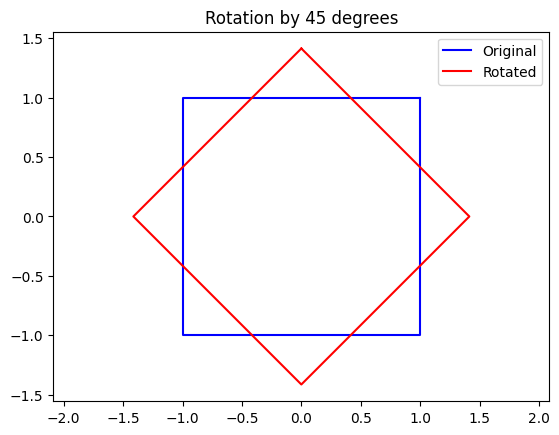

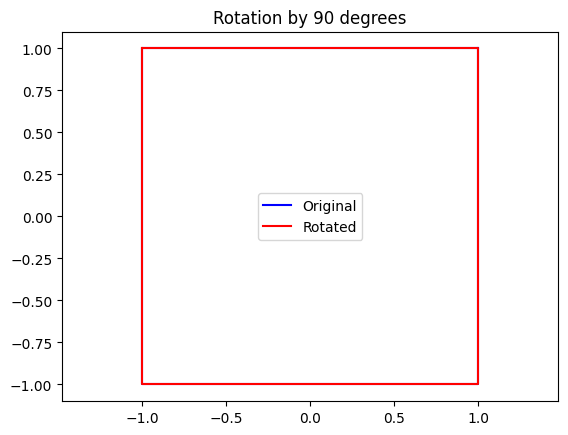

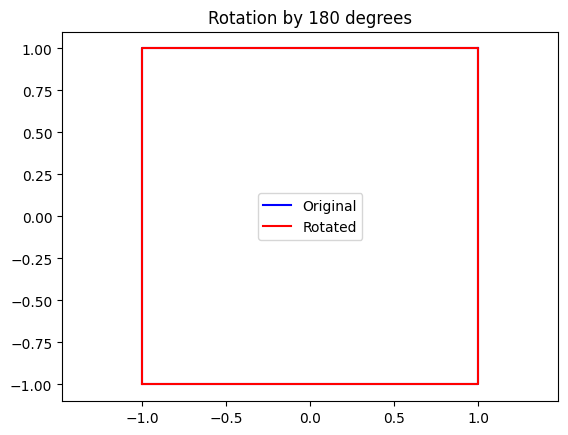

In [24]:
import matplotlib.pyplot as plt

for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_points = R @ points
    plt.figure()
    plt.plot(points[0, :], points[1, :], 'b-', label='Original')
    plt.plot(rotated_points[0, :], rotated_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()


---

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.

---

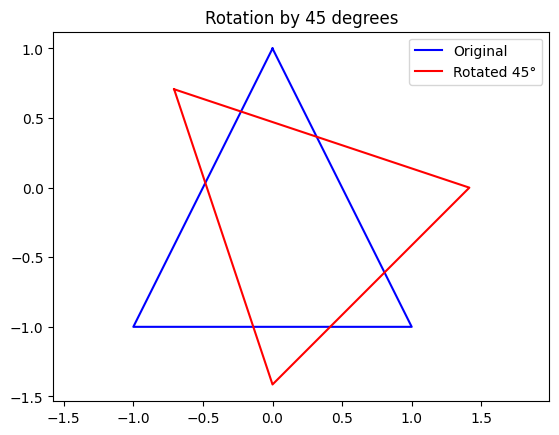

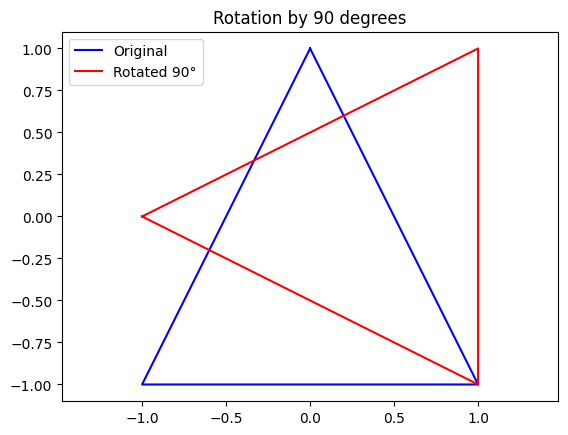

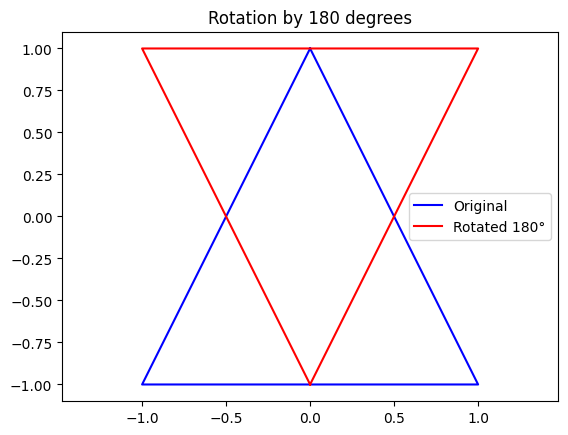

In [25]:

# Write the solution here

import numpy as np
import matplotlib.pyplot as plt

# Generar puntos para un triángulo en 2D
triangle = np.array([[0, 1, -1, 0], [1, -1, -1, 1]])  # Cierra el triángulo volviendo al punto inicial

# Función para crear la matriz de rotación
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R

# Aplicar rotaciones y graficar
for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_triangle = R @ triangle

    plt.figure()
    plt.plot(triangle[0, :], triangle[1, :], 'b-', label='Original')
    plt.plot(rotated_triangle[0, :], rotated_triangle[1, :], 'r-', label=f'Rotated {theta}°')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()

## Exercise for Graduate students: Image Compression and Reconstruction using SVD

Use Singular Value Decomposition (SVD) to compress and reconstruct an image, exploring the trade-offs between compression ratio and image quality. This exercise will highlight the utility of SVD in practical image processing tasks.

### Steps

#### 1. Image Preparation
- Load a grayscale image into a Numpy array.
- Display the original image.

#### 2. Applying SVD
- Perform SVD on the image matrix to obtain U, Σ, and V^T.
- Display the shapes of U, Σ, and V^T.

#### 3. Image Compression
- Choose a set of singular values (e.g., first 10, 20).
- Reconstruct the image using only the chosen singular values.
- Repeat with different numbers of singular values to explore different compression levels.

#### 4. Visualization and Analysis
- Display original and compressed images side by side.
- Discuss the compression ratio and impact on image quality for each compression level.

#### 5. Advanced Exploration (Optional)
- Test the compression on different image types.
- Explore SVD in noise reduction by altering singular values before reconstruction.

### Requirements
- Use Numpy for SVD and matrix operations.
- Use matplotlib or similar for image handling.
- Provide explanations for each step, emphasizing the principles and applications of SVD.

In [ ]:
# Write the solution here


# Image compression using SVD
#
# Author: Dewei Chen
# Date: 12/12/15
# https://github.com/mutaphore/svd-image-compression
# This program has following dependencies:
# skimage, matplotlib, scipy, numpy and PIL

import argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy import linalg
from PIL import Image
from skimage import io, img_as_float, img_as_uint
from skimage.metrics import structural_similarity as ssim


def combine(U, S, V):
	return np.dot(np.dot(U, S), V)

def svd_compress_ssim(img, target_ss):
	"""Compress image by finding k that is closest to target ssim.
	Since rank and ssim relationship is linear, we do a
	binary search, followed by finer grained linear search"""
	rank = min(img.shape[0], img.shape[1])
	left = 1
	right = rank
	last_ss = 100
	k = 1
	compressed = None
	U, singular_vals, V = linalg.svd(img)
	# binary search
	while left < right:
		k = (left + right) / 2
		S_p = np.zeros((k, k), img.dtype)
		for i in range(k):
			S_p[i][i] = singular_vals[i]
		compressed = combine(U[:,:k], S_p, V[:k,:])
		ss = ssim(img, compressed, data_range=img.max() - img.min())
		if abs(ss - target_ss) < abs(last_ss - target_ss):
			last_ss = ss
			if ss > target_ss:
				right = k
			else:
				left = k
		else:
			break
	# more fine grained linear search
	if last_ss < target_ss:
		while 1:
			S_p = np.zeros((k + 1, k + 1), img.dtype)
			for i in range(k + 1):
				S_p[i][i] = singular_vals[i]
			compressed = combine(U[:,:k+1], S_p, V[:k+1,:])
			ss = ssim(img, compressed,
				dynamic_range=compressed.max()-compressed.min())
			if abs(ss - target_ss) < abs(last_ss - target_ss):
				last_ss = ss
				k += 1
			else:
				break
	else:
		while 1:
			S_p = np.zeros((k - 1, k - 1), img.dtype)
			for i in range(k - 1):
				S_p[i][i] = singular_vals[i]
			compressed = combine(U[:,:k-1], S_p, V[:k-1,:])
			ss = ssim(img, compressed,
				dynamic_range=compressed.max()-compressed.min())
			if abs(ss - target_ss) < abs(last_ss - target_ss):
				last_ss = ss
				k -= 1
			else:
				break
	print ("Best k found %r with ssim %r" % (k, last_ss))
	return compressed

def svd_compress_gs(img, k):
	"""Given a matrix representing a grayscale image, compress
	it by taking the largest k elements from its singular values"""
	U, singular_vals, V = linalg.svd(img)
	rank = len(singular_vals)
	print ("Image rank %r" % rank)
	if k > rank:
		print ("k is larger than rank of image %r" % rank)
		return img
	# take columns less than k from U
	U_p = U[:,:k]
	# take rows less than k from V
	V_p = V[:k,:]
	# build the new S matrix with top k diagnal elements
	S_p = np.zeros((k, k), img.dtype)
	for i in range(k):
		S_p[i][i] = singular_vals[i]
	print ("U_p shape {0}, S_p shape {1}, V_p shape {2}".format(
		U_p.shape, S_p.shape, V_p.shape))
	compressed = np.dot(np.dot(U_p, S_p), V_p)
	ss = ssim(img, compressed,
		dynamic_range=compressed.max()-compressed.min())
	print ("Strucural similarity: %r" % ss)
	return compressed

def svd_compress_rgb(img, k_r, k_g, k_b):
	"""Given a matrix representing a RGB image, compress
	it by taking the largest k elements from its singular values"""
	# split into separate channels
	comp_r = svd_compress_gs(img[:,:,0], k_r)
	comp_g = svd_compress_gs(img[:,:,1], k_g)
	comp_b = svd_compress_gs(img[:,:,2], k_b)
	new_img = np.zeros(img.shape, img.dtype)
	nrows = img.shape[0]
	ncols = img.shape[1]
	nchans = img.shape[2]
	for i in range(nrows):
		for j in range(ncols):
			for c in range(nchans):
				val = 0
				if c == 0:
					val = comp_r[i][j]
				elif c == 1:
					val = comp_g[i][j]
				else:
					val = comp_b[i][j]
				# float64 values must be between -1.0 and 1.0
				if val < -1.0:
					val = -1.0
				elif val > 1.0:
					val = 1.0
				new_img[i][j][c] = val
	return new_img

def compress_ratio(orig_img, k):
	"""Calculate the compression ratio of an compressed image
	to the original image."""
	m = float(orig_img.shape[0])
	n = float(orig_img.shape[1])
	comp_bytes = 0
	if len(orig_img.shape) > 2:
		comp_bytes += k[0] * (m + n + 1)
		comp_bytes += k[1] * (m + n + 1)
		comp_bytes += k[2] * (m + n + 1)
		return comp_bytes / (3 * m * n)
	else:
		comp_bytes = k[0] * (m + n + 1)
		return comp_bytes / (m * n)

def compress_images_k(in_dir, out_dir, num_imgs, img_format, k_values):
	"""Compress images with different k values. Compressed format is png."""
	for i in range(1, num_imgs+1):
		img = io.imread("{0}/{1}.{2}".format(in_dir, i, img_format))
		img = img_as_float(img)
		for k in k_values:
			filename = "{0}/{1}/{2}.png".format(out_dir, i, k)
			print (filename)
			# check if this is an RGB or grayscale image
			compressed = None
			if len(img.shape) > 2:
				compressed = svd_compress_rgb(img, k, k, k)
			else:
				compressed = svd_compress_gs(img, k)
			io.imsave(filename, compressed)

def compress_images_ss(in_dir, out_dir, num_imgs, img_format, ss_values):
	"""Compress images with different k values. Compressed format is png."""
	for i in range(1, num_imgs+1):
		img = io.imread("{0}/{1}.{2}".format(in_dir, i, img_format))
		img = img_as_float(img)
		for ss in ss_values:
			filename = "{0}/{1}/{2}.png".format(out_dir, i, str(ss).replace('.', ''))
			print (filename)
			# check if this is an RGB or grayscale image
			compressed = svd_compress_ssim(img, ss)
			io.imsave(filename, compressed)

def main():
	parser = argparse.ArgumentParser(description='Image compression with SVD')
	parser.add_argument('-c', dest='compress', nargs='?', help='compress image using SVD')
	parser.add_argument('-k', dest='k', nargs='*', default=['5', '5', '5'], help='compression factor k (default 5)')
	parser.add_argument('-s', dest='ssim', nargs=2, help='calculate ssim between 2 images')
	parser.add_argument('-r', dest='size', type=int, default=100, help='image resize percentage (default 100)')
	parser.add_argument('-f', dest='fname', nargs='?', help='saved compressed image to file')
	args = parser.parse_args()
	args.k = [int(x) for x in args.k]

	if args.ssim:
		img1 = img_as_float(io.imread(args.ssim[0]))
		img2 = img_as_float(io.imread(args.ssim[1]))
		ss = ssim(img1, img2)
		print ("Strucural similarity: %r" % ss)
	elif args.compress:
		img = io.imread(args.compress)
		print ("Original image dimensions {0}".format(img.shape))
		if args.size < 100:
			img = misc.imresize(img, args.size)
		img = img_as_float(img)
		# check if this is an RGB or grayscale image
		if len(img.shape) > 2:
			if len(args.k) != img.shape[2]:
				print ("Provide correct number of k values (%r)" % img.shape[2])
				return
			compressed = svd_compress_rgb(img, args.k[0], args.k[1], args.k[2])
		else:
			compressed = svd_compress_gs(img, args.k[0])
		print ("Compression ratio: %r" % compress_ratio(img, args.k))
		if args.fname:
			io.imsave(args.fname, compressed)
		io.imshow(compressed)
		io.show()
	elif args.size < 100:
		print ("Resizing image to {0}%".format(args.r))
		img = misc.imresize(img, args.size)
		plt.figure(figsize=(10, 3.6))
		plt.imshow(img)
		plt.show()
	else:
		parser.print_help()

if __name__ == '__main__':
	main()

	# compress images with different k values
	# compress_images_k("../gs", "../gsdiffk", 10, "pgm", [1, 3, 5, 10, 15, 20])
	# compress_images_k("../rgb", "../rgbdiffk", 10, "jpg", [5, 15, 25, 35, 45])

	# compress images with different target ss values using svd_compress_ssim
	# compress_images_ss("../gs", "../gsdiffss", 10, "pgm", [0.5, 0.6, 0.7, 0.8, 0.9])

## Summary

In this section we have seen how to using Numpy:

- Manipulate matrices;
- Solve linear systems;
- Compute Matrix inverses and determinants.

This again just touches on the capabilities of Numpy. For more information please refer to this [Python tutorial.](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb)